In [1]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pandas-ta
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader 
!pip install sklearn
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 4.8 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=8faa4425b90412b75686f4b395e697244f4966a72f90ddc16d3d155f596e5572
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 4.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple

In [3]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import numpy as np 
import pandas as pd 
from datetime import timedelta, datetime, date
import matplotlib.pyplot as plt
import pandas_datareader as web 
import pandas_ta as ta
from fbprophet import Prophet

In [5]:
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2017-01-01'

In [6]:
stockname = 'AAPL' #input("Enter stock symbol: ")
df = web.DataReader(stockname ,'yahoo' ,start=date_start, end=date_today)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257641
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227135
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365595
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670673
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924122
...,...,...,...,...,...,...
2022-06-16,132.389999,129.039993,132.080002,130.059998,108123900.0,130.059998
2022-06-17,133.080002,129.809998,130.070007,131.559998,134118500.0,131.559998
2022-06-21,137.059998,133.320007,133.419998,135.869995,81000500.0,135.869995


In [7]:
k = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()
d = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

macd = k - d
macd_s = macd.ewm(span=9, adjust=False, min_periods=9).mean()

In [8]:
df['macd'] = df.index.map(macd)
df['macd_s'] = df.index.map(macd_s)
df.head(50)

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s
Date,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257641,NaN,NaN
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227135,NaN,NaN
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365595,NaN,NaN
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670673,NaN,NaN
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924122,NaN,NaN
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,27.952284,NaN,NaN
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.102476,NaN,NaN
2017-01-12,29.825001,29.552500,29.725000,29.812500,108344800.0,27.985142,NaN,NaN
2017-01-13,29.905001,29.702499,29.777500,29.760000,104447600.0,27.935862,NaN,NaN


In [9]:
df['14-MA'] = df['Close'].rolling(14).mean()
df['5-MA'] = df['Close'].rolling(5).mean()

In [10]:
df['Price_Osc']=(df['14-MA']-df['5-MA'])/df['14-MA']

In [11]:
df['RSI']= ta.rsi(df['Close'], length = 14)

In [12]:
d = pd.to_datetime(df.index)
df['Month'] = d.strftime("%m")
df['Year'] = d.strftime("%Y")

In [13]:
pvo=ta.pvo(df['Volume'])
pvo=pvo['PVO_12_26_9']
df['PVO']=pvo
df.head(50)

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s,14-MA,5-MA,Price_Osc,RSI,Month,Year,PVO
Date,,,,,,,,,,,,,,,
2017-01-03,29.082500,28.690001,28.950001,29.037500,115127600.0,27.257641,NaN,NaN,NaN,NaN,NaN,NaN,01,2017,NaN
2017-01-04,29.127501,28.937500,28.962500,29.004999,84472400.0,27.227135,NaN,NaN,NaN,NaN,NaN,NaN,01,2017,NaN
2017-01-05,29.215000,28.952499,28.980000,29.152500,88774400.0,27.365595,NaN,NaN,NaN,NaN,NaN,NaN,01,2017,NaN
2017-01-06,29.540001,29.117500,29.195000,29.477501,127007600.0,27.670673,NaN,NaN,NaN,NaN,NaN,NaN,01,2017,NaN
2017-01-09,29.857500,29.485001,29.487499,29.747499,134247600.0,27.924122,NaN,NaN,NaN,29.284000,NaN,NaN,01,2017,NaN
2017-01-10,29.844999,29.575001,29.692499,29.777500,97848400.0,27.952284,NaN,NaN,NaN,29.432000,NaN,NaN,01,2017,NaN
2017-01-11,29.982500,29.650000,29.684999,29.937500,110354400.0,28.102476,NaN,NaN,NaN,29.618500,NaN,NaN,01,2017,NaN
2017-01-12,29.825001,29.552500,29.725000,29.812500,108344800.0,27.985142,NaN,NaN,NaN,29.750500,NaN,NaN,01,2017,NaN
2017-01-13,29.905001,29.702499,29.777500,29.760000,104447600.0,27.935862,NaN,NaN,NaN,29.807000,NaN,NaN,01,2017,NaN


In [14]:
df = df.iloc[33:]
df.head()

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s,14-MA,5-MA,Price_Osc,RSI,Month,Year,PVO
Date,,,,,,,,,,,,,,,
2017-02-21,34.187500,33.994999,34.057499,34.174999,98028800.0,32.219322,1.070067,1.002418,33.149107,33.9150,-0.023104,92.322837,02,2017,-2.599868
2017-02-22,34.279999,34.027500,34.107498,34.277500,83347600.0,32.315960,1.074865,1.016908,33.298392,34.0195,-0.021656,92.630158,02,2017,-4.554016
2017-02-23,34.369999,34.075001,34.345001,34.132500,83152800.0,32.179253,1.054807,1.024488,33.441250,34.0705,-0.018817,87.305882,02,2017,-6.125439
2017-02-24,34.165001,33.820000,33.977501,34.165001,87106400.0,32.209904,1.029664,1.025523,33.576607,34.1360,-0.016660,87.479599,02,2017,-7.045801
2017-02-27,34.360001,34.070000,34.285000,34.232498,81029600.0,32.273529,1.003616,1.021142,33.695178,34.1965,-0.014878,87.851421,02,2017,-8.208194


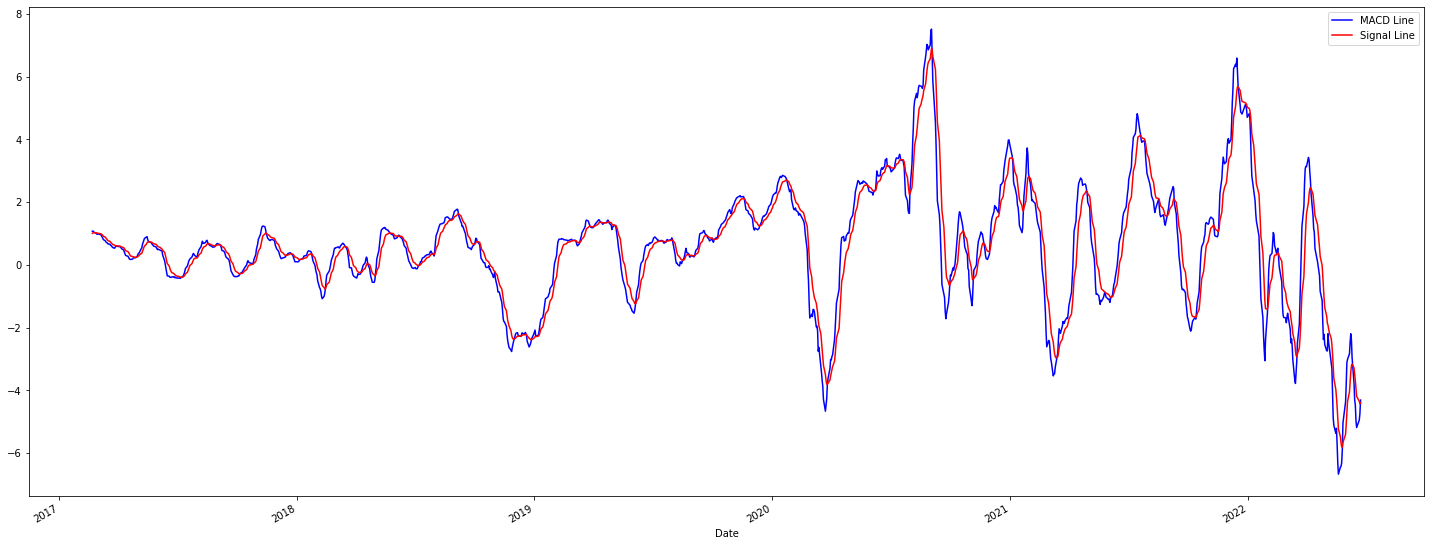

In [15]:
df['macd'].plot(label = 'MACD Line', figsize = (25,10), color = 'b')
df['macd_s'].plot(label = 'Signal Line', color = 'r')
plt.legend()

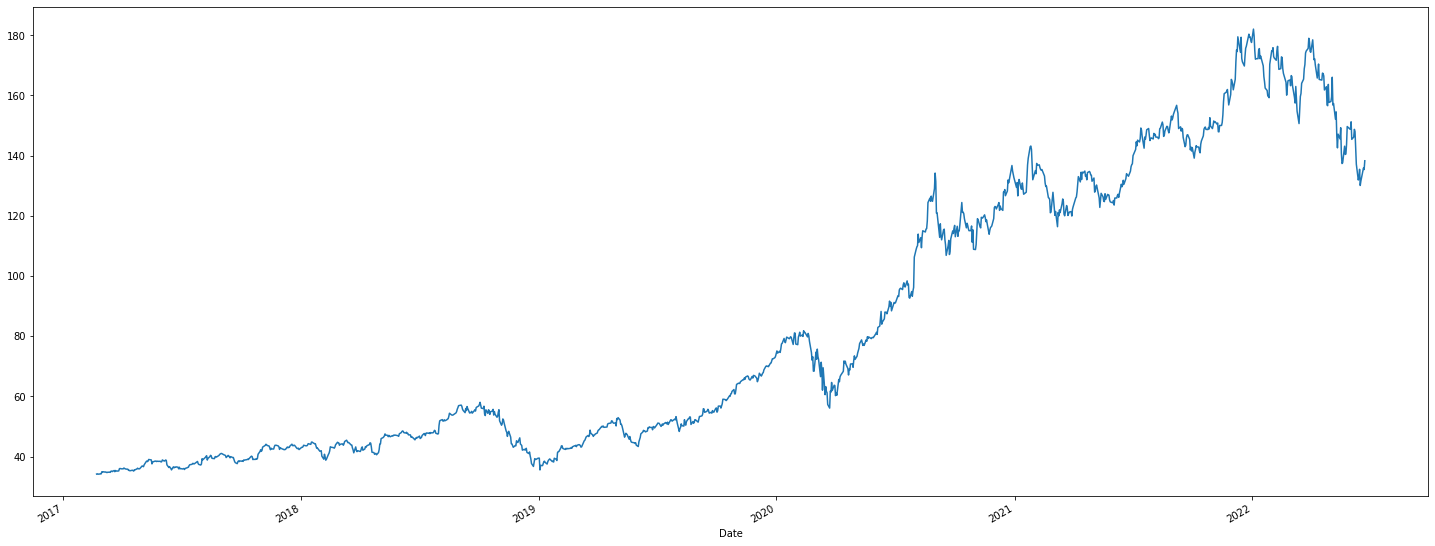

In [16]:
df['Close'].plot(label = 'Close price', figsize = (25,10))

In [17]:
FEATURES = ['Price_Osc', 'RSI', 'macd', 'PVO','Close']
print('FEATURE LIST')
print([f for f in FEATURES])

FEATURE LIST
['Price_Osc', 'RSI', 'macd', 'PVO', 'Close']


In [18]:
train_df = df.sort_values(by=['Date']).copy()

In [19]:
date_index = train_df.index
print(date_index)
train_df = train_df.reset_index(drop=True).copy() 

DatetimeIndex(['2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24',
               '2017-02-27', '2017-02-28', '2017-03-01', '2017-03-02',
               '2017-03-03', '2017-03-06',
               ...
               '2022-06-09', '2022-06-10', '2022-06-13', '2022-06-14',
               '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-21',
               '2022-06-22', '2022-06-23'],
              dtype='datetime64[ns]', name='Date', length=1345, freq=None)


In [20]:
train_df.head(5)

,High,Low,Open,Close,Volume,Adj Close,macd,macd_s,14-MA,5-MA,Price_Osc,RSI,Month,Year,PVO
0,34.187500,33.994999,34.057499,34.174999,98028800.0,32.219322,1.070067,1.002418,33.149107,33.9150,-0.023104,92.322837,02,2017,-2.599868
1,34.279999,34.027500,34.107498,34.277500,83347600.0,32.315960,1.074865,1.016908,33.298392,34.0195,-0.021656,92.630158,02,2017,-4.554016
2,34.369999,34.075001,34.345001,34.132500,83152800.0,32.179253,1.054807,1.024488,33.441250,34.0705,-0.018817,87.305882,02,2017,-6.125439
3,34.165001,33.820000,33.977501,34.165001,87106400.0,32.209904,1.029664,1.025523,33.576607,34.1360,-0.016660,87.479599,02,2017,-7.045801
4,34.360001,34.070000,34.285000,34.232498,81029600.0,32.273529,1.003616,1.021142,33.695178,34.1965,-0.014878,87.851421,02,2017,-8.208194


In [21]:
data = pd.DataFrame(train_df)
data_filtered = data[FEATURES]

data_filtered_ext = data_filtered.copy()

In [22]:
data_filtered['Date'] = date_index  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
data_filtered

,Price_Osc,RSI,macd,PVO,Close,Date
0,-0.023104,92.322837,1.070067,-2.599868,34.174999,2017-02-21
1,-0.021656,92.630158,1.074865,-4.554016,34.277500,2017-02-22
2,-0.018817,87.305882,1.054807,-6.125439,34.132500,2017-02-23
3,-0.016660,87.479599,1.029664,-7.045801,34.165001,2017-02-24
4,-0.014878,87.851421,1.003616,-8.208194,34.232498,2017-02-27
...,...,...,...,...,...,...
1340,0.064194,33.793876,-4.970464,-2.816923,130.059998,2022-06-16
1341,0.063525,36.002033,-5.185911,0.965992,131.559998,2022-06-17
1342,0.051661,41.989071,-4.951793,-0.515833,135.869995,2022-06-21
1343,0.041455,41.484831,-4.753417,-2.352365,135.350006,2022-06-22


In [24]:
nrows = data_filtered.shape[0]
np_data_unscaled = np.array(data_filtered)
np_data = np.reshape(np_data_unscaled, (nrows, -1))
print(np_data.shape)

(1345, 6)


In [25]:
import math
sequence_length = 50
index_Close = data.columns.get_loc("Close")
train_data_len = math.ceil(data_filtered.shape[0] * 0.8)

In [26]:
train_data = data_filtered[0:train_data_len]
train_data

,Price_Osc,RSI,macd,PVO,Close,Date
0,-0.023104,92.322837,1.070067,-2.599868,34.174999,2017-02-21
1,-0.021656,92.630158,1.074865,-4.554016,34.277500,2017-02-22
2,-0.018817,87.305882,1.054807,-6.125439,34.132500,2017-02-23
3,-0.016660,87.479599,1.029664,-7.045801,34.165001,2017-02-24
4,-0.014878,87.851421,1.003616,-8.208194,34.232498,2017-02-27
...,...,...,...,...,...,...
1071,0.005298,48.301657,-1.049034,-6.443769,127.099998,2021-05-24
1072,0.001382,47.863597,-0.960293,-7.044379,126.900002,2021-05-25
1073,-0.003673,47.747003,-0.883812,-9.007875,126.849998,2021-05-26
1074,-0.003255,44.113469,-0.939061,-6.673296,125.279999,2021-05-27


In [27]:
test_data = data_filtered[train_data_len:]
test_data.head()

,Price_Osc,RSI,macd,PVO,Close,Date
1076,0.000332,41.872264,-1.107140,-7.717275,124.279999,2021-06-01
1077,0.004558,44.365871,-1.096583,-9.035327,125.059998,2021-06-02
1078,0.009016,40.701585,-1.197068,-8.217335,123.540001,2021-06-03
1079,0.007165,47.870212,-1.074689,-7.593954,125.889999,2021-06-04
1080,0.004901,47.899082,-0.965764,-7.455566,125.900002,2021-06-07


In [28]:
test_data.rename(columns={'Close': 'y', 'Date': 'ds'},inplace=True)
test_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Price_Osc,RSI,macd,PVO,y,ds
1076,0.000332,41.872264,-1.107140,-7.717275,124.279999,2021-06-01
1077,0.004558,44.365871,-1.096583,-9.035327,125.059998,2021-06-02
1078,0.009016,40.701585,-1.197068,-8.217335,123.540001,2021-06-03
1079,0.007165,47.870212,-1.074689,-7.593954,125.889999,2021-06-04
1080,0.004901,47.899082,-0.965764,-7.455566,125.900002,2021-06-07


In [29]:
train_data.rename(columns={'Close': 'y', 'Date': 'ds'},inplace=True)
train_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Price_Osc,RSI,macd,PVO,y,ds
0,-0.023104,92.322837,1.070067,-2.599868,34.174999,2017-02-21
1,-0.021656,92.630158,1.074865,-4.554016,34.277500,2017-02-22
2,-0.018817,87.305882,1.054807,-6.125439,34.132500,2017-02-23
3,-0.016660,87.479599,1.029664,-7.045801,34.165001,2017-02-24
4,-0.014878,87.851421,1.003616,-8.208194,34.232498,2017-02-27


In [30]:
model=Prophet(interval_width=0.9)
model.add_regressor('Price_Osc', standardize=False)
model.add_regressor('RSI', standardize= False)
model.add_regressor('macd',standardize=False)
model.add_regressor('PVO',standardize=False)
model.fit(train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
model.params

{'beta': array([[-3.73509367e-02,  3.66979396e-02,  3.67581801e-03,
         -4.67562564e-03,  5.16418196e-03, -1.87041488e-03,
          8.14947944e-04,  1.44639875e-03,  6.54892316e-04,
         -2.16300584e-03, -2.40878817e-03, -2.01742497e-03,
         -4.02403296e-04, -7.42570758e-04,  2.74758544e-03,
          3.63141678e-04, -2.10101362e-03,  8.33087118e-05,
         -2.38596733e-04, -1.28531441e-03,  5.22941386e-03,
         -4.05966700e-03, -4.89467115e-03, -1.02078729e-03,
          7.71618818e-04,  1.68723536e-03,  1.59343476e-01,
          5.03052200e-04,  1.81383228e-02,  6.96435127e-04]]),
 'delta': array([[-1.18698871e-01, -1.42311326e+00, -3.43730531e-01,
          2.00144413e-03,  1.37224380e+00,  7.61243282e-01,
          3.44040591e-03, -2.26324804e-02, -1.22629991e+00,
         -7.72733430e-01,  2.98434806e-03,  1.61768341e-01,
         -1.15984675e-03,  1.92931371e+00,  1.51040784e-01,
         -1.08697536e+00, -1.14099479e+00, -2.49545477e-01,
          2.04263269

In [32]:
test_data_2 = test_data[['ds','Price_Osc','RSI','macd','PVO']]            
test_data_2.head()

,ds,Price_Osc,RSI,macd,PVO
1076,2021-06-01,0.000332,41.872264,-1.107140,-7.717275
1077,2021-06-02,0.004558,44.365871,-1.096583,-9.035327
1078,2021-06-03,0.009016,40.701585,-1.197068,-8.217335
1079,2021-06-04,0.007165,47.870212,-1.074689,-7.593954
1080,2021-06-07,0.004901,47.899082,-0.965764,-7.455566


In [33]:
forecast1=model.predict(test_data_2)
forecast1=forecast1[[ 'ds', 'yhat']]   
forecast1.head()

,ds,yhat
0,2021-06-01,130.543126
1,2021-06-02,130.988512
2,2021-06-03,130.885705
3,2021-06-04,131.846557
4,2021-06-07,132.692368


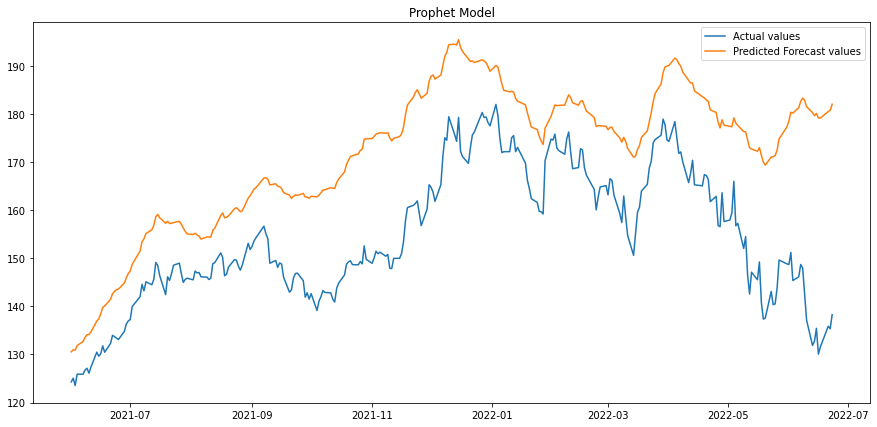

In [34]:
plt.figure(figsize=(15,7))
plt.plot(forecast1['ds'],test_data['y'],label='Actual values')
plt.plot(forecast1['ds'],forecast1['yhat'],label='Predicted Forecast values')
plt.title('Prophet Model')
plt.legend()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

actual = np.array(test_data['y'])
pred = np.array(forecast1['yhat'])

print('Prophet Model Error Results')

# Mean Absolute Error (MAE)
MAE = mean_absolute_error(actual, pred)
print(f'Mean Absolute Error (MAE): {np.round(MAE, 2)}')

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(actual, pred)/ actual))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(actual, pred)/ actual)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Prophet Model Error Results
Mean Absolute Error (MAE): 17.14
Mean Absolute Percentage Error (MAPE): 11.31 %
Median Absolute Percentage Error (MDAPE): 9.22 %


In [36]:
price_today = np.round(test_data['y'].iloc[-1],2)
predicted_price = np.round(forecast1['yhat'].iloc[-1],2)
change_percent = np.round(100 - (price_today * 100)/predicted_price, 2)

plus = '+'; minus = ''
print("Result of the predicted price on a given day (Using Prophet model)")
print(f'The close price for {stockname} at {today} is {price_today}')
print(f'The predicted close price is {predicted_price} ({plus if change_percent > 0 else minus}{change_percent}%)')

Result of the predicted price on a given day (Using Prophet model)
The close price for AAPL at 2022-06-24 is 138.27
The predicted close price is 182.05 (+24.05%)


In [37]:
from scipy import stats
stats.pearsonr(actual, pred)

(0.8164993409862016, 1.1996289806532649e-65)